## Holographic Reconstruction on CPU

In [1]:
import numpy as np
import os
from skimage.restoration import unwrap_phase
from fringe.utils.io import import_image, import_image_seq, export_image
from fringe.utils.modifiers import ImageToArray, PreprocessHologram
from fringe.process.cpu import AngularSpectrumSolver as AsSolver, MultiHeightPhaseRecovery as MHPR
import matplotlib
from matplotlib import pyplot as plt

### Back Propagation
Forward reconstruction of inline holograms using angular spectrum method.
#### Import Images
- Specify paths to the background (if exists) and hologram images.
- Images are needed to be standardized using ProcessHologram

In [2]:
bg_path = "PATH_TO_BACKGROUND_IMAGE.tif"
h_path = "images/sequence/0_300.tif"
p1 = ImageToArray(bit_depth=16, channel='gray', crop_window=None, dtype='float32')
#bg = import_image(bg_path, preprocessor=p1)
bg = np.ones((512, 512))  # if no background
p2 = PreprocessHologram(background=bg)
h = import_image(h_path, preprocessor=[p1, p2])

z = -300

Image imported from: images/sequence/0_300.tif


#### Solve
- Initialize angular spectrum solver.
- Call solver.reconstruct() and pass the complex-valued hologram and its z distance as parameters.

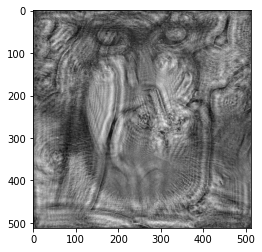

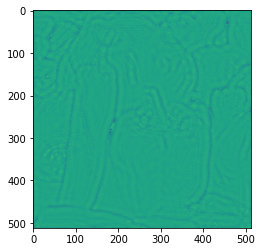

In [3]:

obj = h + 0j
solver = AsSolver(shape=obj.shape, dx=1.12, dy=1.12, wavelength=532e-3)

rec = solver.solve(obj, z)
amp = np.abs(rec)
phase = unwrap_phase(np.angle(rec))

plt.imshow(amp, cmap='gray')
plt.show()
plt.imshow(phase, cmap='viridis')
plt.show()

### Multi-Height-Phase-Recovery (MHPR)
Iterative phase retrieval procedure for inline holograms using a sequence of axially displaced hologram images.
#### Import images
- Specify paths to background image (if exists) and hologram sequence and assign their heights in the <b><i>z_values</i></b> array.

In [4]:
bg_path = "PATH_TO_BACKGROUND_IMAGE.tif"

img_seq_paths = [
	"images/sequence/0_300.tif",
	"images/sequence/1_350.tif",
	"images/sequence/2_400.tif",
	"images/sequence/3_450.tif",
	"images/sequence/4_500.tif",
	"images/sequence/5_550.tif",
	"images/sequence/6_600.tif",
	"images/sequence/7_650.tif"
]

p1 = ImageToArray(bit_depth=16, channel='gray', crop_window=None, dtype='float32')
#bg = import_image(bg_path, preprocessor=p1)
bg = np.ones((512, 512))  # if no background
p2 = PreprocessHologram(background=bg)
h_seq = import_image_seq(img_seq_paths, preprocessor=[p1, p2])

z_values = [-300, -350, -400, -450, -500, -550, -600, -650]
iterations = 100

Image imported from: images/sequence/0_300.tif
Image imported from: images/sequence/1_350.tif
Image imported from: images/sequence/2_400.tif
Image imported from: images/sequence/3_450.tif
Image imported from: images/sequence/4_500.tif
Image imported from: images/sequence/5_550.tif
Image imported from: images/sequence/6_600.tif
Image imported from: images/sequence/7_650.tif


#### Solve
- Initialize angular spectrum solver.
- Initialize MHPR and pass the solver as parameter.
- Call mhpr.resolve() and pass hologram sequence, z_values and number of iterations to the as input parameters.

step: 0
step: 5
step: 10
step: 15
step: 20
step: 25
step: 30
step: 35
step: 40
step: 45
step: 50
step: 55
step: 60
step: 65
step: 70
step: 75
step: 80
step: 85
step: 90
step: 95


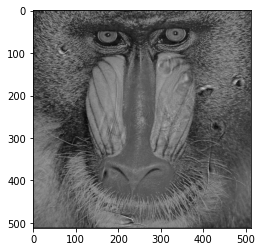

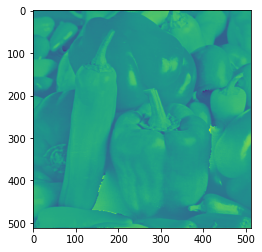

In [5]:
solver = AsSolver(shape=h_seq[0].shape, dx=1.12, dy=1.12, wavelength=532e-3)

mhpr = MHPR(solver)
recovered_h = mhpr.solve(h_seq, z_values, iterations)
amp = np.abs(recovered_h)
phase = unwrap_phase(np.angle(recovered_h))
phase += np.pi
phase /= 2 * np.pi

plt.imshow(amp, cmap='gray')
plt.show()
plt.imshow(phase, cmap='viridis')
plt.show()


#### Export Results

In [6]:
cmap = matplotlib.cm.get_cmap('viridis')

export_image(amp, os.path.join('images/exports', 'amplitude.png'), dtype='uint8')
export_image(phase, os.path.join('images/exports', 'phase.png'), dtype='uint8')
export_image(cmap(phase), os.path.join('images/exports', 'phase_colored.png'), dtype='uint8')


Image exported to: docs/images/exports\amplitude.png
Image exported to: docs/images/exports\phase.png
Image exported to: docs/images/exports\phase_colored.png
